In [1]:
import numpy as np
import pandas as pd

In [2]:
temp_df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df = temp_df.iloc[:10000]

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.drop_duplicates(inplace=True)

C:\Users\no name\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Text Preparation

In [6]:
import re
import string
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, "html.parser")
    text_without_tags = soup.get_text()

    # Convert text to lowercase
    lowercase_text = text_without_tags.lower()

    # Remove non-alphabetic characters and punctuation
    cleaned_text = re.sub(r"[^a-zA-Z]", " ", lowercase_text)
    cleaned_text = cleaned_text.translate(str.maketrans("", "", string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(cleaned_text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the lemmatized tokens back into a single string
    processed_text = " ".join(lemmatized_tokens)

    return processed_text

# Example usage
text = "A wonderful little production. <br /><br />liques remains solid@#@!@#*(@#$bly well done."

processed_text = preprocess_text(text)

print(processed_text)


wonderful little production liques remains solid bly well done


In [7]:
df['review'] = df['review'].apply(preprocess_text)

C:\Users\NONAME~1\AppData\Local\Temp/ipykernel_524/1093675617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(preprocess_text)


In [12]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [13]:
story = []
for doc in df['review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    

In [14]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [15]:
model.build_vocab(story)

In [16]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(5481843, 5866730)

In [17]:
len(model.wv.index_to_key)

28272

In [18]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

In [19]:
document_vector(df['review'].values[0])

array([-0.30160972,  0.46338737,  0.06948095,  0.2244268 ,  0.02305673,
       -0.7226544 ,  0.04956278,  0.6286266 , -0.2848495 , -0.22878294,
       -0.13572827, -0.5063967 ,  0.03838582,  0.35528845,  0.18986289,
       -0.506386  ,  0.29905444, -0.45603073,  0.07732759, -0.6963616 ,
        0.23951766,  0.16370802,  0.23890151, -0.2784454 , -0.1840706 ,
        0.18379952, -0.19124548, -0.22496873, -0.4137096 ,  0.23561099,
        0.5617707 ,  0.04745121,  0.06103392, -0.34704027, -0.40684065,
        0.5715056 ,  0.07609809, -0.33107233, -0.22619407, -0.59654516,
        0.10788296, -0.05136892, -0.09929027,  0.0861501 ,  0.18507197,
       -0.21161011, -0.37294048, -0.2454013 ,  0.1196326 ,  0.3579077 ,
        0.2962651 , -0.05215681, -0.10028233,  0.0326902 , -0.30318344,
        0.06465027,  0.33536118, -0.11532143, -0.5487949 ,  0.22881849,
        0.17475343,  0.14069687, -0.03727592,  0.0116173 , -0.4642079 ,
        0.26516056,  0.22931388,  0.16503152, -0.36538085,  0.43

In [20]:
from tqdm import tqdm

In [21]:
X = []
for doc in tqdm(df['review'].values):
    X.append(document_vector(doc))

100%|██████████| 9983/9983 [17:22<00:00,  9.57it/s]   


In [22]:
X= np.array(X)

In [23]:
X[0]

array([-0.30160972,  0.46338737,  0.06948095,  0.2244268 ,  0.02305673,
       -0.7226544 ,  0.04956278,  0.6286266 , -0.2848495 , -0.22878294,
       -0.13572827, -0.5063967 ,  0.03838582,  0.35528845,  0.18986289,
       -0.506386  ,  0.29905444, -0.45603073,  0.07732759, -0.6963616 ,
        0.23951766,  0.16370802,  0.23890151, -0.2784454 , -0.1840706 ,
        0.18379952, -0.19124548, -0.22496873, -0.4137096 ,  0.23561099,
        0.5617707 ,  0.04745121,  0.06103392, -0.34704027, -0.40684065,
        0.5715056 ,  0.07609809, -0.33107233, -0.22619407, -0.59654516,
        0.10788296, -0.05136892, -0.09929027,  0.0861501 ,  0.18507197,
       -0.21161011, -0.37294048, -0.2454013 ,  0.1196326 ,  0.3579077 ,
        0.2962651 , -0.05215681, -0.10028233,  0.0326902 , -0.30318344,
        0.06465027,  0.33536118, -0.11532143, -0.5487949 ,  0.22881849,
        0.17475343,  0.14069687, -0.03727592,  0.0116173 , -0.4642079 ,
        0.26516056,  0.22931388,  0.16503152, -0.36538085,  0.43

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'])

In [25]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_rf=accuracy_score(y_test,y_pred)

0.8137205808713069

In [28]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)


0.828743114672008

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy_gb=accuracy_score(y_test, y_pred)


0.8152228342513771

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)


C:\Users\no name\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8307461191787682

In [41]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)


0.8137205808713069

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize individual classifiers
rf = RandomForestClassifier()
svm = SVC()
gb = GradientBoostingClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('svm', svm),
        ('gb', gb),
        ('lr', lr),
        ('xgb', xgb)
    ],
    voting='hard'  # Use majority voting
)

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Accuracy:", accuracy)

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


C:\Users\no name\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy: 0.8222333500250375
Confusion Matrix:
[[773 179]
 [176 869]]


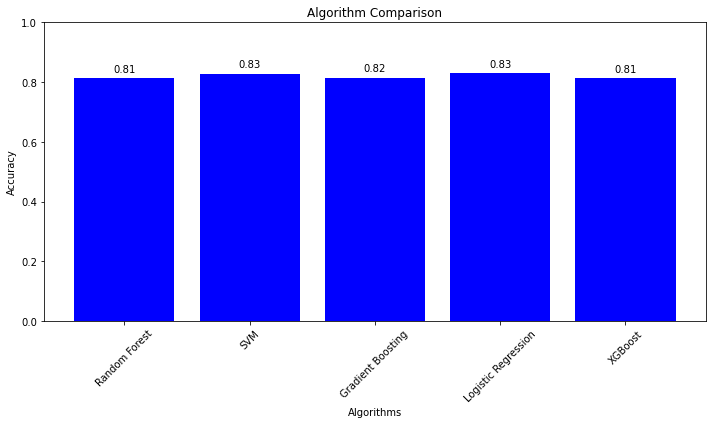

In [46]:
import matplotlib.pyplot as plt

# List of algorithms and their corresponding accuracies
algorithms = ['Random Forest', 'SVM', 'Gradient Boosting','Logistic Regression', 'XGBoost']
accuracies = [0.8137205808713069,0.828743114672008 , 0.8152228342513771,0.8307461191787682,0.8137205808713069]  # Replace with actual accuracy values


# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(algorithms[:len(accuracies)], accuracies, color='blue')
plt.title('Algorithm Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center')

# Show the plot
plt.tight_layout()
plt.show()



